### COVID-19 by Income
#### Zack Snyder

The goal of this code is to join the COVID datasets with Economic Indicators to view Confirmed Cases and Test accross Country Level Income Categories

In [1]:
#Import dependancies
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
#Loading in the COVID-19 Cases Dataset
file1 = "covid_19_clean_complete_03212020.csv"
covid = pd.read_csv(file1)


In [3]:
#Loading in the World Bank Income categories
file2 = "WB Income Compares.csv"
income = pd.read_csv(file2)


In [4]:
#premptivley loading in the COVID-19 Tests dataset
file3 = "covid-19-tests-country.csv"
results = pd.read_csv(file3)
results = results.rename(columns={"Code":"Country Code"})
results = results[["Country Code","Total COVID-19 tests","Population (Millions)"]]


In [5]:
#renaming the headers of the World Bankd Dataset
columns = ['Country Code','Country','2002','2018']
income = income[columns]
income = income.rename(columns={"Country":"Country/Region","2002":"2002 Income","2018":"2018 Income"})

In [6]:
#Altering the Country Names in the World Bank Dataset to match the Country Names in the Covid-19 Cases dataset

income = income.replace(to_replace = "United States", value = "US")
income = income.replace(to_replace = "Brunei Darussalam", value = "Brunei")
income = income.replace(to_replace = "Iran, Islamic Rep.", value = "Iran")
income = income.replace(to_replace = "Russian Federation", value = "Russia")
income = income.replace(to_replace = "Korea, Rep.", value = "Korea, South")
income = income.replace(to_replace = "Egypt, Arab Rep.", value = "Egypt")
income = income.replace(to_replace = "Côte d'Ivoire", value = "Cote d'Ivoire")
income = income.replace(to_replace = "Czech Republic", value = "Czechia")
income = income.replace(to_replace = "Taiwan, China", value = "Taiwan*")
income = income.replace(to_replace = "Slovak Republic", value = "Slovakia")
income = income.replace(to_replace = "Venezuela, RB", value = "Venezuela")
income = income.replace(to_replace = "St. Martin (French part)", value = "Martinique")
income = income.replace(to_replace = "St. Vincent and the Grenadines", value = "Saint Vincent and the Grenadines")
income = income.replace(to_replace = "St. Lucia", value = "Saint Lucia")
income = income.replace(to_replace = "Kyrgyz Republic", value = "Kyrgyzstan")
income = income.replace(to_replace = "Congo, Rep.", value = "Congo (Brazzaville)")
income = income.replace(to_replace = "Congo, Dem. Rep.", value = "Congo (Kinshasa)")



In [7]:
#grouping by country to condence the data and removing the time series aspect of the dataset
covid = covid.groupby('Country/Region').max()
covid

,Province/State,Lat,Long,Date,Confirmed,Deaths,Recovered
Country/Region,,,,,,,
Afghanistan,NaN,33.0000,65.0000,3/9/20,24,0,1
Albania,NaN,41.1533,20.1683,3/9/20,70,2,0
Algeria,NaN,28.0339,1.6596,3/9/20,90,11,32
Andorra,NaN,42.5063,1.5218,3/9/20,75,0,1
Angola,NaN,-11.2027,17.8739,3/9/20,1,0,0
...,...,...,...,...,...,...,...
Uzbekistan,NaN,41.3775,64.5853,3/9/20,33,0,0
Venezuela,NaN,6.4238,-66.5897,3/9/20,42,0,0
Vietnam,NaN,16.0000,108.0000,3/9/20,91,0,16


In [8]:
#merging the COVID-19 Cases Dataset with the World Bank Dataset
merge_table = pd.merge(covid, income, on="Country/Region",how="left")
merge_table

,Country/Region,Province/State,Lat,Long,Date,Confirmed,Deaths,Recovered,Country Code,2002 Income,2018 Income
0,Afghanistan,NaN,33.0000,65.0000,3/9/20,24,0,1,AFG,L,L
1,Albania,NaN,41.1533,20.1683,3/9/20,70,2,0,ALB,LM,UM
2,Algeria,NaN,28.0339,1.6596,3/9/20,90,11,32,DZA,LM,UM
3,Andorra,NaN,42.5063,1.5218,3/9/20,75,0,1,AND,H,H
4,Angola,NaN,-11.2027,17.8739,3/9/20,1,0,0,AGO,L,LM
...,...,...,...,...,...,...,...,...,...,...,...
157,Uzbekistan,NaN,41.3775,64.5853,3/9/20,33,0,0,UZB,L,LM
158,Venezuela,NaN,6.4238,-66.5897,3/9/20,42,0,0,VEN,UM,UM
159,Vietnam,NaN,16.0000,108.0000,3/9/20,91,0,16,VNM,L,LM
160,Zambia,NaN,-15.4167,28.2833,3/9/20,2,0,0,ZMB,L,LM


Text(0.5, 0, 'Income Category')

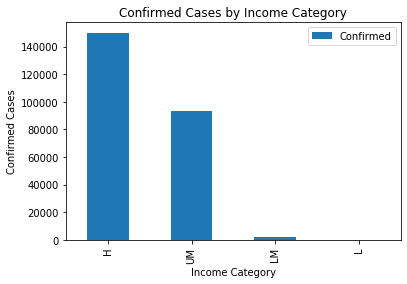

In [35]:
#Graphing the number of confirmed cases by Income Category
df1 = merge_table.groupby('2018 Income').sum().reset_index()
df1 = df1[['2018 Income','Confirmed']]
df1 = df1.set_index("2018 Income")
df1 = df1.sort_values("Confirmed", ascending=False)
df1.plot(kind = "bar", title = "Confirmed Cases by Income Category")
plt.ylabel("Confirmed Cases")
plt.xlabel("Income Category")

In [34]:
df1 = df1.reset_index()
df1

,2018 Income,Confirmed
0,H,150033
1,UM,93508
2,LM,2222
3,L,141


Text(0.5, 0, 'Income Category')

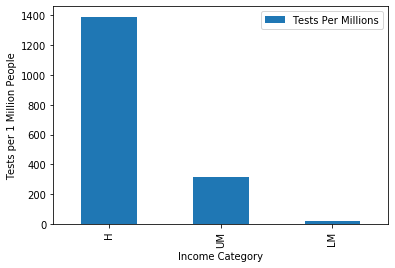

In [43]:
#Merging the World Bank Dataset with the COVID-19 Tests Dataset

df2 = pd.merge(results,income, on="Country Code",how="left")
df2 = df2.groupby("2018 Income").sum()
df2["Tests Per Millions"] = round(df2["Total COVID-19 tests"]/df2["Population (Millions)"],2)
df2 = df2.reset_index()
df2 = df2[["2018 Income","Tests Per Millions"]]
df2 = df2.set_index("2018 Income")
df2 = df2.sort_values("Tests Per Millions", ascending=False)


df2.plot(kind="bar")
plt.ylabel("Tests per 1 Million People")
plt.xlabel("Income Category")

In [12]:
df2

,Tests Per Millions
2018 Income,
H,1391.66
UM,317.34
LM,18.71
